## Final Project Submission

Please fill out:
* Student name: Thai Hang Nguyen
* Student pace: part time 
* Scheduled project review date/time: 14/05/2023
* Instructor name: Hardik
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
df2 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
#df1

In [3]:
#df1[pd.isnull(df1["foreign_gross"])]

In [4]:
df1_rename ={"title": "Movie", "studio": "Studio", "domestic_gross": "Domestic Gross", "foreign_gross": "Foreign Gross", "year": "Year"}
df1 = df1.rename(columns =df1_rename)
df1

,Movie,Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
df2.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [6]:
df2["production_budget"] = df2["production_budget"].str.replace("[$,]", "", regex = True).astype(float)
df2["domestic_gross"] = df2["domestic_gross"].str.replace("[$,]", "", regex = True).astype(float)
df2["worldwide_gross"] = df2["worldwide_gross"].str.replace("[$,]", "", regex = True).astype(float)
df2["release_date"] = pd.to_datetime(df2["release_date"].astype("datetime64[ns]"))
#df2

In [7]:
df2.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object

In [8]:
df2["Foreign Gross"] = df2["worldwide_gross"] - df2["domestic_gross"]

In [9]:
df2_rename = {"id": "ID", "release_date": "Release Date", "movie":"Movie", "production_budget": "Production Budget", "domestic_gross":"Domestic Gross", "worldwide_gross": "Worldwide Gross"}
df2 = df2.rename(columns = df2_rename)
#df2

In [10]:
df1 = df1.drop(columns = ["Domestic Gross", "Foreign Gross", "Year"])
#df1

In [11]:
df3 = pd.merge(df1, df2, on = "Movie", how = "inner")
#df3

In [12]:
df3.isnull().sum()

Movie                0
Studio               1
ID                   0
Release Date         0
Production Budget    0
Domestic Gross       0
Worldwide Gross      0
Foreign Gross        0
dtype: int64

In [13]:
df3 = df3[pd.notnull(df3["Studio"])]
#df3

In [14]:
df3.isnull().sum()

Movie                0
Studio               0
ID                   0
Release Date         0
Production Budget    0
Domestic Gross       0
Worldwide Gross      0
Foreign Gross        0
dtype: int64

In [15]:
df3

,Movie,Studio,ID,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross
0,Toy Story 3,BV,47,2010-06-18,200000000.0,415004880.0,1.068880e+09,653874642.0
1,Inception,WB,38,2010-07-16,160000000.0,292576195.0,8.355246e+08,542948447.0
2,Shrek Forever After,P/DW,27,2010-05-21,165000000.0,238736787.0,7.562447e+08,517507886.0
3,The Twilight Saga: Eclipse,Sum.,53,2010-06-30,68000000.0,300531751.0,7.061028e+08,405571077.0
4,Iron Man 2,Par.,15,2010-05-07,170000000.0,312433331.0,6.211564e+08,308723058.0
...,...,...,...,...,...,...,...,...
1242,Gotti,VE,64,2018-06-15,10000000.0,4286367.0,6.089100e+06,1802733.0
1243,Ben is Back,RAtt.,95,2018-12-07,13000000.0,3703182.0,9.633111e+06,5929929.0
1244,Bilal: A New Breed of Hero,VE,100,2018-02-02,30000000.0,490973.0,6.485990e+05,157626.0
1245,Mandy,RLJ,71,2018-09-14,6000000.0,1214525.0,1.427656e+06,213131.0


In [16]:
df3.groupby("Studio")["Worldwide Gross"].agg(["count","mean"]).sort_values(by= "mean", ascending = False).head(10)

,count,mean
Studio,,
P/DW,10,5.078028e+08
BV,72,4.623058e+08
GrtIndia,1,2.635029e+08
Fox,110,2.435983e+08
Sony,74,2.378623e+08
Uni.,117,2.335837e+08
WB (NL),37,2.308342e+08
WB,102,2.175864e+08
Par.,74,1.951109e+08


In [17]:
Production_mean = df3.groupby("Studio")["Production Budget"].agg(["count","mean"]).sort_values(by= "mean", ascending = False).head(10)
Domestic_mean = df3.groupby("Studio")["Domestic Gross"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)
Foreign_mean = df3.groupby("Studio")["Foreign Gross"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)

In [18]:
df_mean = pd.merge(Production_mean, Domestic_mean, on = "Studio", how = "inner")
df_total_mean = pd.merge(df_mean, Foreign_mean, on = "Studio", how = "inner")
df_rename_columns = {"count": "Count", "mean_x": "Production Budget", "mean_y":"Domestic Gross", "mean": "Foreign Gross"}
df_total_mean = df_total_mean.rename(columns = df_rename_columns)
#df_total_mean

In [22]:
df_total_mean["Production Budget"] = pd.to_numeric(df_total_mean["Production Budget"]).astype(int)
df_total_mean["Domestic Gross"] = pd.to_numeric(df_total_mean["Domestic Gross"]).astype(int)
df_total_mean["Foreign Gross"] = pd.to_numeric(df_total_mean["Foreign Gross"]).astype(int)
df_total_mean

,Count,Production Budget,Domestic Gross,Foreign Gross
Studio,,,,
P/DW,10,133400000,168291468,339511291
BV,72,131261111,179529752,282776052
WB,102,80369607,89514979,128071412
Fox,110,70504545,85547581,158050721
Sony,74,68250000,95404857,142457446
Par.,74,64459459,81178423,113932484
WB (NL),37,58070270,92368382,138465786
Uni.,117,56390598,91511460,142072199


<Axes: ylabel='Studio'>

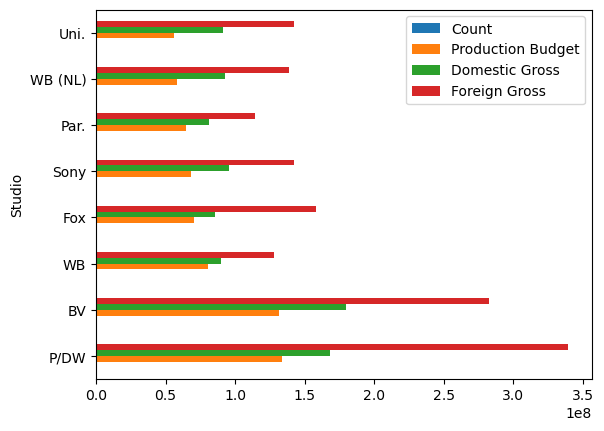

In [20]:
df_total_mean.plot(kind = "barh")

In [23]:
df3

,Movie,Studio,ID,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross
0,Toy Story 3,BV,47,2010-06-18,200000000.0,415004880.0,1.068880e+09,653874642.0
1,Inception,WB,38,2010-07-16,160000000.0,292576195.0,8.355246e+08,542948447.0
2,Shrek Forever After,P/DW,27,2010-05-21,165000000.0,238736787.0,7.562447e+08,517507886.0
3,The Twilight Saga: Eclipse,Sum.,53,2010-06-30,68000000.0,300531751.0,7.061028e+08,405571077.0
4,Iron Man 2,Par.,15,2010-05-07,170000000.0,312433331.0,6.211564e+08,308723058.0
...,...,...,...,...,...,...,...,...
1242,Gotti,VE,64,2018-06-15,10000000.0,4286367.0,6.089100e+06,1802733.0
1243,Ben is Back,RAtt.,95,2018-12-07,13000000.0,3703182.0,9.633111e+06,5929929.0
1244,Bilal: A New Breed of Hero,VE,100,2018-02-02,30000000.0,490973.0,6.485990e+05,157626.0
1245,Mandy,RLJ,71,2018-09-14,6000000.0,1214525.0,1.427656e+06,213131.0


In [24]:
df3["Month"] = pd.DatetimeIndex(df3["Release Date"]).month
df3["Year"] = pd.DatetimeIndex(df3["Release Date"]).year
df3

,Movie,Studio,ID,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross,Month,Year
0,Toy Story 3,BV,47,2010-06-18,200000000.0,415004880.0,1.068880e+09,653874642.0,6,2010
1,Inception,WB,38,2010-07-16,160000000.0,292576195.0,8.355246e+08,542948447.0,7,2010
2,Shrek Forever After,P/DW,27,2010-05-21,165000000.0,238736787.0,7.562447e+08,517507886.0,5,2010
3,The Twilight Saga: Eclipse,Sum.,53,2010-06-30,68000000.0,300531751.0,7.061028e+08,405571077.0,6,2010
4,Iron Man 2,Par.,15,2010-05-07,170000000.0,312433331.0,6.211564e+08,308723058.0,5,2010
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,64,2018-06-15,10000000.0,4286367.0,6.089100e+06,1802733.0,6,2018
1243,Ben is Back,RAtt.,95,2018-12-07,13000000.0,3703182.0,9.633111e+06,5929929.0,12,2018
1244,Bilal: A New Breed of Hero,VE,100,2018-02-02,30000000.0,490973.0,6.485990e+05,157626.0,2,2018
1245,Mandy,RLJ,71,2018-09-14,6000000.0,1214525.0,1.427656e+06,213131.0,9,2018


In [ ]:
df4 = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
df5 = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
df6 = pd.merge(df5, df4, on = "tconst", how = "inner")
df6

In [ ]:
df6.isnull().sum()

In [ ]:
df6["genres"].value_counts()